# Qiskit implementations
## RYGate
https://qiskit.org/documentation/stubs/qiskit.circuit.library.RYGate.html

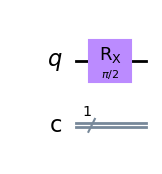

In [47]:
from qiskit import QuantumCircuit
from math import pi
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_multivector
qc = QuantumCircuit(1,1)
# qc.h(0)
qc.rx(pi/2,0)
qc.draw(output='mpl')


Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


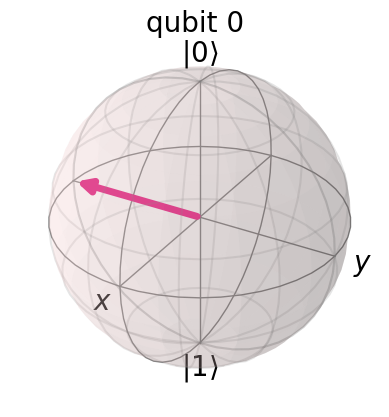

In [48]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)  # Print the final statevector
plot_bloch_multivector(statevector)  # Visualize the final state on the Bloch sphere


In [40]:
qc.name
qc.num_clbits
qc.unit

'dt'

In [28]:
# qc.ry(pi/2,0).condition_bits
# qc.definition
# qc.label
# qc.params
print(qc.unit)

dt


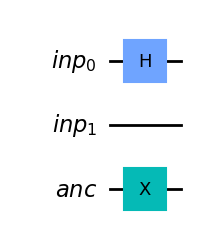

In [37]:
# Q3
from qiskit import QuantumRegister
inp_reg = QuantumRegister(2,name='inp')
ancilla = QuantumRegister(1,name='anc')
qc = QuantumCircuit (inp_reg, ancilla)
qc.h(inp_reg[0])
qc.x(ancilla)
qc.draw(output='mpl')

## initialize
Q8

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


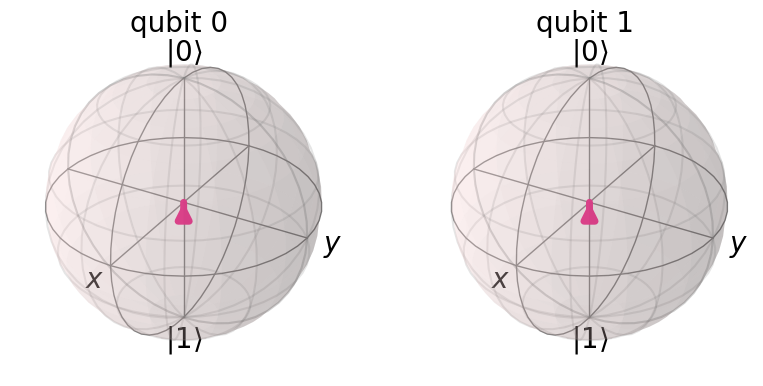

In [52]:
#Q9
from math import sqrt
qc=QuantumCircuit(2)
# v = [1/sqrt(2),0,0,1/sqrt(2)]
# qc.initialize(v,[0,1])
qc.h(0)
qc.cx(0,1)
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector) 
plot_bloch_multivector(statevector)  

## Operators
https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html



In [60]:
from qiskit.quantum_info.operators import Operator
qc = QuantumCircuit(4)
# qc.mcx([0,1],3)
# qc.draw(output='mpl')
qc_gate=qc.to_gate()
Operator(qc_gate)


Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
           0.+0.j, 

## CXGate().control()

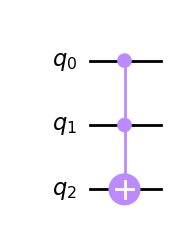

In [70]:
from qiskit.circuit.library import CXGate
qc = QuantumCircuit(3)
ccx=CXGate().control()

qc.append(ccx, [0,1,2])
qc.draw(output='mpl')

## barrier
Q11

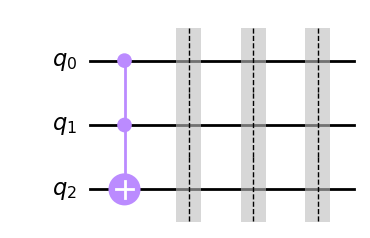

In [75]:
qc.barrier()
qc.draw(output='mpl')

## CouplingMap
https://qiskit.org/documentation/stubs/qiskit.transpiler.CouplingMap.html

- Executing Experiments (qiskit.execute_function)
https://qiskit.org/documentation/apidoc/execute.html

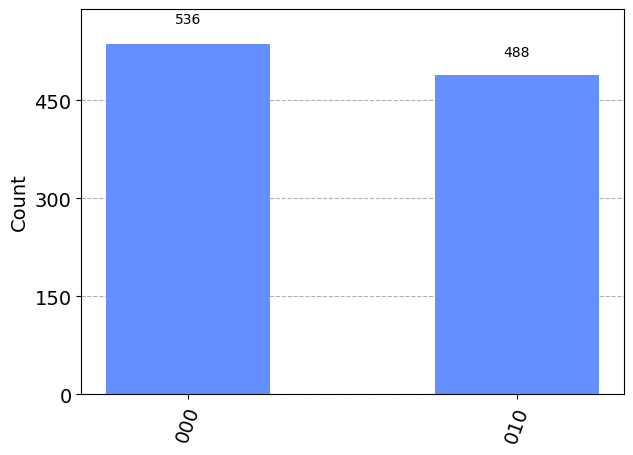

In [97]:
from qiskit.visualization import plot_histogram
qc= QuantumCircuit(3,3)
qc.h(1)
qc.measure([0,1,2],[0,1,2])
backend = Aer.get_backend('qasm_simulator')
couple_map = [[0,1],[1,2]]
job = execute(qc, backend = backend, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## BasicAer
- BasicAer: Python-based Simulators (qiskit.providers.basicaer)
https://qiskit.org/documentation/apidoc/providers_basicaer.html



In [101]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')
backend = BasicAer.get_backend('statevector_simulator')
backend = BasicAer.get_backend('unitary_simulator')
# backend.BasicAerProvider()?

## fidelity
- Quantum Information (qiskit.quantum_info)
https://qiskit.org/documentation/apidoc/quantum_info.html

# Explorer


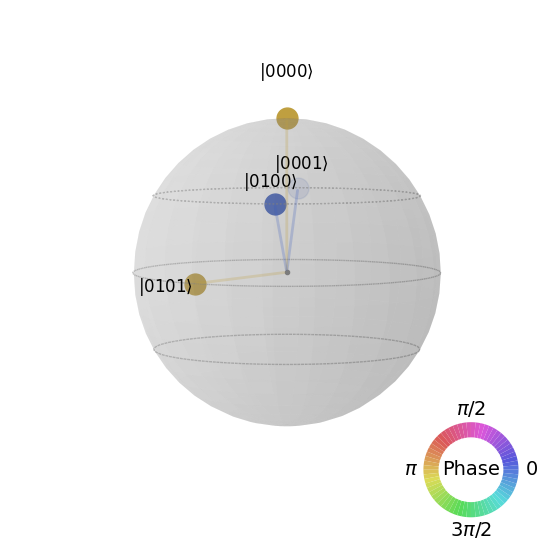

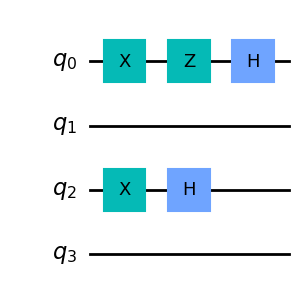

In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

####### build your code below #########

circuit = QuantumCircuit(4)

circuit.x(0)
circuit.z(0)
circuit.h(0)
circuit.x(2)
circuit.h(2)
circuit.x(2)
####### build your code above #########

display(plot_state_qsphere(circuit))
display(circuit.draw('mpl'))


In [5]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
